In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split, learning_curve
from sklearn import linear_model, preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
import warnings 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
red_winequality ='Capstone2_EDA_red.csv'
red_wine = pd.read_csv(red_winequality)
red_wine.head()

,Unnamed: 0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
white_winequality ='Capstone2_EDA_white.csv'
white_wine = pd.read_csv(white_winequality)
white_wine.head()

,Unnamed: 0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,1599,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1600,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1601,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1602,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1603,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# split quality into hi/lo >=7
conditions = [red_wine['quality'] >= 7, red_wine['quality'] < 7,]
outputs = ['1', '0']
red_wine['qual_bin'] = pd.to_numeric(np.select(conditions, outputs))

conditions = [white_wine['quality'] >= 7, white_wine['quality'] < 7,]
outputs = ['1', '0']
white_wine['qual_bin'] = pd.to_numeric(np.select(conditions, outputs))

In [5]:
#drop quality
red_wine = red_wine.drop(red_wine[['quality']], axis = 1)
white_wine = white_wine.drop(white_wine[['quality']], axis = 1)

In [6]:
# train, test, split
red_X_train, red_X_test, red_y_train, red_y_test = train_test_split(red_wine.drop(columns='qual_bin'), 
                                                    red_wine.qual_bin, test_size=0.3, 
                                                    random_state=12)
white_X_train, white_X_test, white_y_train, white_y_test = train_test_split(white_wine.drop(columns='qual_bin'),
                                                    white_wine.qual_bin, test_size=0.3, 
                                                    random_state=12)

In [7]:
red_X_train.shape, red_X_test.shape

((1119, 12), (480, 12))

In [8]:
red_y_train.shape, red_y_test.shape

((1119,), (480,))

In [9]:
white_X_train.shape, white_X_test.shape

((3428, 12), (1470, 12))

In [10]:
white_y_train.shape, white_y_test.shape

((3428,), (1470,))

In [11]:
# Scale data
scaler = preprocessing.RobustScaler()
scaler.fit(red_X_train)
red_X_train_scaled = scaler.transform(red_X_train)
red_X_test_scaled = scaler.transform(red_X_test)
scaler.fit(white_X_train)
white_X_train_scaled = scaler.transform(white_X_train)
white_X_test_scaled = scaler.transform(white_X_test)

In [12]:
# Testing model fit
lr = RandomForestClassifier().fit(red_X_train_scaled, red_y_train)
red_y_train_pred = lr.predict(red_X_train_scaled)
red_y_test_pred = lr.predict(red_X_test_scaled)
r2_score(red_y_train, red_y_train_pred), r2_score(red_y_test, red_y_test_pred)

(1.0, 0.19999999999999996)

In [13]:
lr = RandomForestClassifier().fit(white_X_train_scaled, white_y_train)
white_y_train_pred = lr.predict(white_X_train_scaled)
white_y_test_pred = lr.predict(white_X_test_scaled)
r2_score(white_y_train, white_y_train_pred), r2_score(white_y_test, white_y_test_pred)

(1.0, 0.27442135957718217)

In [14]:
# Data quantity assessment: what is the optimal amount for a data sample?
pipe = make_pipeline(SimpleImputer(strategy='median'), RobustScaler(), RandomForestClassifier())

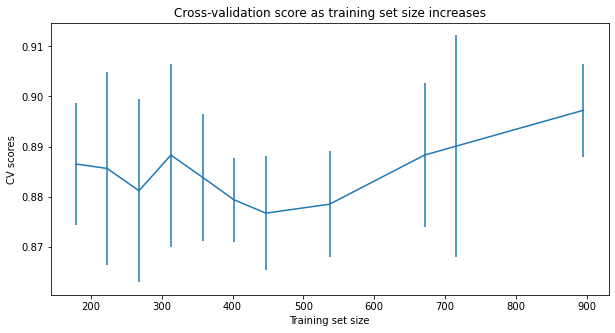

In [15]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(pipe, red_X_train, red_y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');
# Optimal red wine data sample appears to be around 700

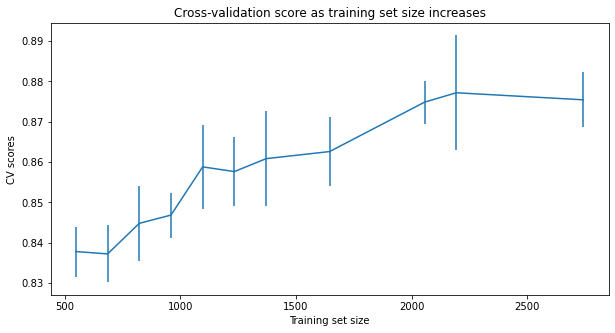

In [16]:
# white
train_size, train_scores, test_scores = learning_curve(pipe, white_X_train, white_y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');
# Optimal white wine data sample appears to be around 1250

In [17]:
#save to csv for later
red_wine.to_csv(r'red_wine_scaled.csv')
white_wine.to_csv(r'white_wine_scaled.csv')